In [9]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
from matplotlib.patches import Patch
import seaborn as sns
import numpy as np
from matplotlib import rc
from matplotlib.font_manager import fontManager
from pathlib import Path
from fd_analysis.prepare import *
from collections import defaultdict

%matplotlib inline

In [5]:

font_path ='/usr/local/share/fonts/Virgil.ttf' 

# Register the font
fontManager.addfont(font_path)
font = {"family":"Virgil 3 YOFF"}
rc("font", **font)

# Import data

In [7]:
paths = "../data/results_biomed_20240423/"

data_biomed, corrupt_biomed = filter_corrupt_files([Path(paths) / file for file in os.listdir(paths)])

print("Corrupt: ", corrupt_biomed)
len(data_biomed)


Corrupt:  []


1818

In [8]:
data_biomed["markerGeneProfile.json"]

{'metadata': {'project_name': 'markerGeneProfile',
  'fawltydeps_version': '0.13.1.1',
  'repo_url': 'https://:@github.com/PavlidisLab/markerGeneProfile.git',
  'creation_timestamp': '2024-04-23T15:56:58.527634'},
 'code_dirs': None,
 'deps_file': [],
 'imports': []}

In [11]:
codedirs = defaultdict(dict)
for k, d in data_biomed.items():
    project_name = d["metadata"]["project_name"]
    if d["code_dirs"] and d["imports"]:
        code_dirs = exctract_code_directories(d["code_dirs"], project_name)
        codedirs[project_name] = code_dirs

df_codedirs = pd.DataFrame.from_dict(codedirs, orient="index")

In [13]:
python_projects = get_python_projects(data_biomed)

In [14]:
len(python_projects)

1260

In [12]:
df_codedirs

darkflow/dark       darkflow/utils       darkflow/net        \
                      py ipynb             py ipynb           py ipynb   
darkflow             6.0   0.0            6.0   0.0          5.0   0.0   
encode2bag           NaN   NaN            NaN   NaN          NaN   NaN   
osmosis              NaN   NaN            NaN   NaN          NaN   NaN   
brian2genn           NaN   NaN            NaN   NaN          NaN   NaN   
yeadon               NaN   NaN            NaN   NaN          NaN   NaN   
...                  ...   ...            ...   ...          ...   ...   
diffusion            NaN   NaN            NaN   NaN          NaN   NaN   
nextmed              NaN   NaN            NaN   NaN          NaN   NaN   
ReproPhylo           NaN   NaN            NaN   NaN          NaN   NaN   
x2k_web              NaN   NaN            NaN   NaN          NaN   NaN   
deep-rules           NaN   NaN            NaN   NaN          NaN   NaN   

           darkflow/net/yolo       darkflow/net/yolov2        ...  \
                          py ipynb                  py ipynb  ...   
darkflow                 5.0   0.0                 4.0   0.0  ...   
encode2bag               NaN   NaN                 NaN   NaN  ...   
osmosis                  NaN   NaN                 NaN   NaN  ...   
brian2genn               NaN   NaN                 NaN   NaN  ...   
yeadon                   NaN   NaN                 NaN   NaN  ...   
...                      ...   ...                 ...   ...  ...   
diffusion                NaN   NaN                 NaN   NaN  ...   
nextmed                  NaN   NaN                 NaN   NaN  ...   
ReproPhylo               NaN   NaN                 NaN   NaN  ...   
x2k_web                  NaN   NaN                 NaN   NaN  ...   
deep-rules               NaN   NaN                 NaN   NaN  ...   

           layer_runs2/n_message_2       layer_runs2/n_message_4        \
                                py ipynb                      py ipynb   
darkflow                       NaN   NaN                     NaN   NaN   
encode2bag                     NaN   NaN                     NaN   NaN   
osmosis                        NaN   NaN                     NaN   NaN   
brian2genn                     NaN   NaN                     NaN   NaN   
yeadon                         NaN   NaN                     NaN   NaN   
...                            ...   ...                     ...   ...   
diffusion                      NaN   NaN                     NaN   NaN   
nextmed                        NaN   NaN                     NaN   NaN   
ReproPhylo                     NaN   NaN                     NaN   NaN   
x2k_web                        NaN   NaN                     NaN   NaN   
deep-rules                     NaN   NaN                     NaN   NaN   

           layer_runs2/n_message_10       layer_runs2/n_message_3        \
                                 py ipynb                      py ipynb   
darkflow                        NaN   NaN                     NaN   NaN   
encode2bag                      NaN   NaN                     NaN   NaN   
osmosis                         NaN   NaN                     NaN   NaN   
brian2genn                      NaN   NaN                     NaN   NaN   
yeadon                          NaN   NaN                     NaN   NaN   
...                             ...   ...                     ...   ...   
diffusion                       NaN   NaN                     NaN   NaN   
nextmed                         NaN   NaN                     NaN   NaN   
ReproPhylo                      NaN   NaN                     NaN   NaN   
x2k_web                         NaN   NaN                     NaN   NaN   
deep-rules                      NaN   NaN                     NaN   NaN   

           20190909_figure4        
                         py ipynb  
darkflow                NaN   NaN  
encode2bag              NaN   NaN  
osmosis                 NaN   NaN  
brian2genn              NaN   N

In [76]:
codedirs_py = df_codedirs.xs("py", level=1, axis=1)
codedirs_ipynb = df_codedirs.xs("ipynb", level=1, axis=1)
codedirs_sum = codedirs_py + codedirs_ipynb


In [79]:
codedirs_sum

,darkflow/dark,darkflow/utils,darkflow/net,darkflow/net/yolo,darkflow/net/yolov2,darkflow/net/ops,PROJECT_NAME,darkflow/net/vanilla,test,darkflow/net/mnist,...,layer_runs2/n_message_6,layer_runs2/n_message_1,layer_runs2/n_message_7,layer_runs2/n_message_8,layer_runs2/n_message_9,layer_runs2/n_message_2,layer_runs2/n_message_4,layer_runs2/n_message_10,layer_runs2/n_message_3,20190909_figure4
darkflow,6.0,6.0,5.0,5.0,4.0,4.0,4.0,2.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
encode2bag,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
osmosis,NaN,NaN,NaN,NaN,NaN,NaN,19.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
brian2genn,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
yeadon,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
diffusion,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nextmed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ReproPhylo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
x2k_web,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [94]:
drop_cols = [
    col
    for col in codedirs_sum.columns
    if "test" in col or "example" in col or "sample" in col
]      

In [97]:
codedirs_sum_main = codedirs_sum.drop(columns = drop_cols).idxmax(axis=1)

/tmp/ipykernel_488484/1632689439.py:1: FutureWarning: The behavior of DataFrame.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  codedirs_sum_main = codedirs_sum.drop(columns = drop_cols).idxmax(axis=1)


In [105]:
codedirs_sum_main

darkflow                  darkflow/dark
encode2bag                 PROJECT_NAME
osmosis                   osmosis/ipynb
brian2genn                 PROJECT_NAME
yeadon                     PROJECT_NAME
                        ...            
diffusion                           NaN
nextmed               src visualization
ReproPhylo         Tutorial_files/Basic
x2k_web       src/main/webapp/notebooks
deep-rules               content/images
Length: 1260, dtype: object

In [136]:
same_name_projects = set([k for k, v in codedirs_sum_main.items() if v == "PROJECT_NAME"])
src_projects = set([k for k, v in codedirs_sum_main.items() if not v != v and v.startswith("src")])
root_dir_projects = set([k for k, v in codedirs_sum_main.items() if v == "."])
rest_projects = python_projects - same_name_projects - src_projects - root_dir_projects

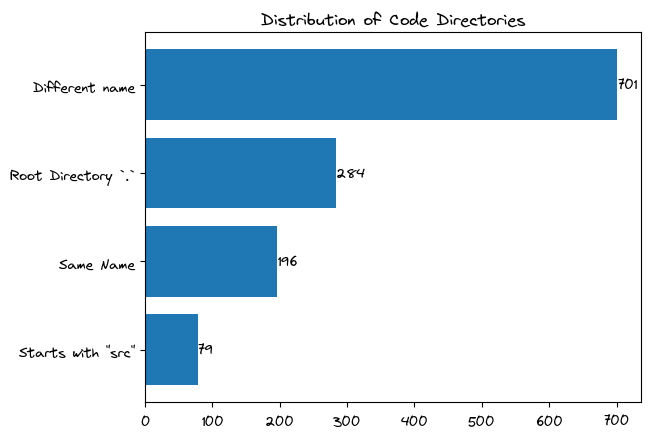

In [144]:
plot_data = pd.DataFrame(
    {
        "Category": [
            "Same Name",
            'Starts with "src"',
            "Different name",
            "Root Directory `.`",
        ],
        "Counts": [
            len(same_name_projects),
            len(src_projects),
            len(rest_projects),
            len(root_dir_projects),
        ]
    }
)

_, ax = plt.subplots()
bars = plt.barh("Category", "Counts", data=plot_data.sort_values("Counts"))
ax.bar_label(bars)
plt.title("Distribution of Code Directories")
plt.show()


In [42]:
depsfiles = get_depsfiles(data_biomed)

732


In [43]:
len(depsfiles)

732

In [44]:
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return "{:.1f}%\n({v:d})".format(pct, v=val)

    return my_format

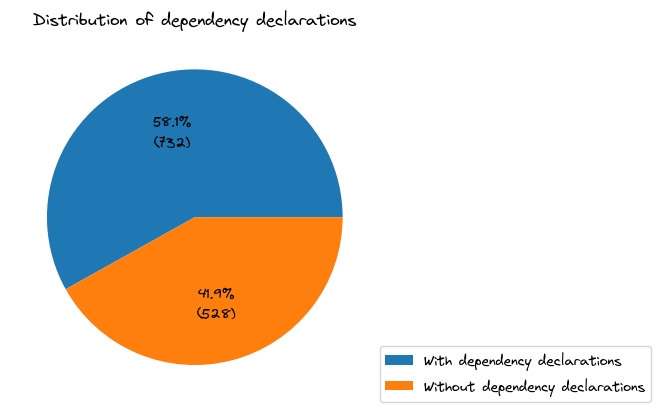

In [71]:
dep_counts = np.array([len(depsfiles), len(python_projects) - len(depsfiles)])
plt.pie(dep_counts, autopct=autopct_format(dep_counts))
plt.title("Distribution of dependency declarations")
plt.legend(loc=(1, 0), labels = ["With dependency declarations", "Without dependency declarations"])
plt.savefig("distribution_deps_1.png", dpi=600, bbox_inches="tight")

In [56]:
depsfiles["darkflow"]

[{'source_type': 'DepsSource',
  'path': 'test/requirements-testing.txt',
  'parser_choice': 'requirements.txt',
  'deps_count': 8,
  'warnings': False},
 {'source_type': 'DepsSource',
  'path': 'setup.py',
  'parser_choice': 'setup.py',
  'deps_count': 0,
  'warnings': True}]

In [59]:
project_req_txt = set()
project_pyproject_toml = set()
project_setup = set()

for project_name, deps in depsfiles.items():
    for dep in deps:
        if dep["parser_choice"] == "requirements.txt":
            project_req_txt.add(project_name)
            break
    for dep in deps:
        if dep["parser_choice"] == "pyproject.toml":
            project_pyproject_toml.add(project_name)
            break
    for dep in deps:
        if dep["parser_choice"].startswith("setup"):
            project_setup.add(project_name)
            break

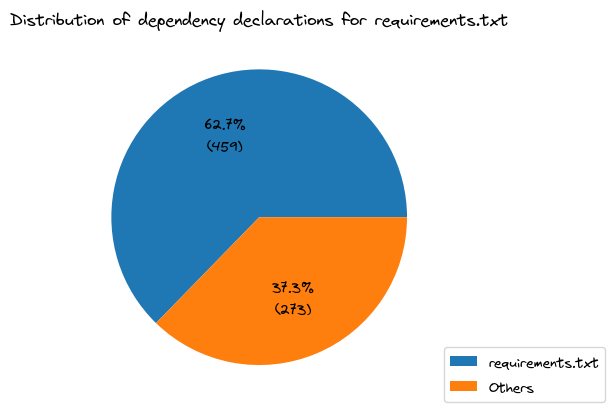

In [204]:
req_txt_counts = np.array([len(project_req_txt), len(depsfiles) - len(project_req_txt)])
plt.pie(req_txt_counts, autopct=autopct_format(req_txt_counts))
plt.title("Distribution of dependency declarations for requirements.txt")
plt.legend(loc=(1, 0), labels = ["requirements.txt", "Others"])
plt.savefig("distribution_deps_0.1.png", dpi=600, bbox_inches="tight")


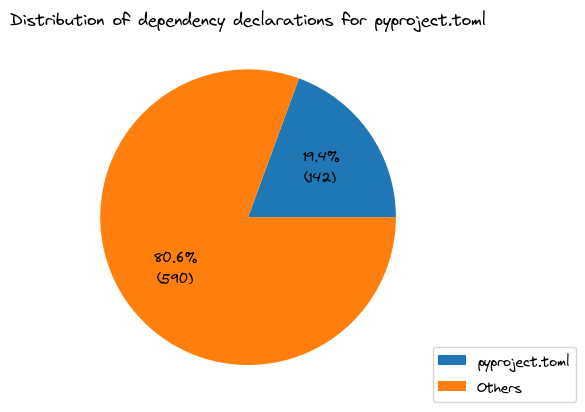

In [205]:
pyproject_toml_counts = np.array([len(project_pyproject_toml), len(depsfiles) - len(project_pyproject_toml)])
plt.pie(pyproject_toml_counts, autopct=autopct_format(pyproject_toml_counts))
plt.title("Distribution of dependency declarations for pyproject.toml")
plt.legend(loc=(1, 0), labels = ["pyproject.toml", "Others"])
plt.savefig("distribution_deps_0.2.png", dpi=600, bbox_inches="tight")

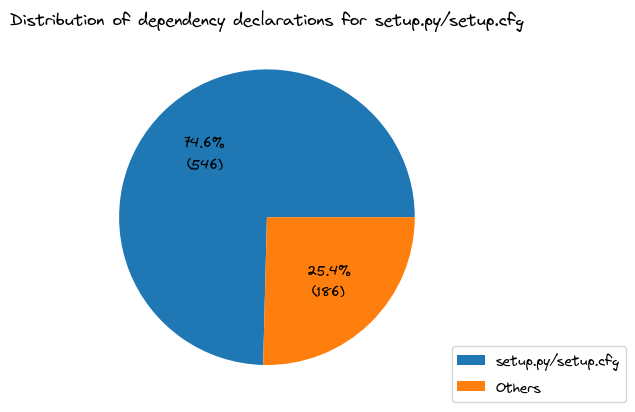

In [206]:
setup_counts = np.array([len(project_setup), len(depsfiles) - len(project_setup)])
plt.pie(setup_counts, autopct=autopct_format(setup_counts))
plt.title("Distribution of dependency declarations for setup.py/setup.cfg")
plt.legend(loc=(1, 0), labels = ["setup.py/setup.cfg", "Others"])
plt.savefig("distribution_deps_0.3.png", dpi=600, bbox_inches="tight")

In [60]:
project_req_only = project_req_txt - project_pyproject_toml - project_setup
project_toml_only = project_pyproject_toml - project_req_txt - project_setup
project_setup_only = project_setup - project_req_txt - project_pyproject_toml
project_req_toml = project_req_txt.intersection(
    project_pyproject_toml
) - project_req_txt.intersection(project_pyproject_toml).intersection(project_setup)
project_req_setup = project_req_txt.intersection(
    project_setup
) - project_req_txt.intersection(project_pyproject_toml).intersection(project_setup)
project_toml_setup = project_pyproject_toml.intersection(
    project_setup
) - project_req_txt.intersection(project_pyproject_toml).intersection(project_setup)
project_req_toml_setup = project_req_txt.intersection(
    project_pyproject_toml
).intersection(project_setup)


In [64]:
df_deps_count = pd.DataFrame(
    dict(
        type_=[
            "requirements.txt only",
            "pyproject.toml only",
            "setup.py/setup.cfg only",
            "requirements.txt and pyproject.toml",
            "requirements.txt and setup.py/setup.cfg",
            "pyproject.toml and setup.py/setup.cfg",
            "requirements.txt, pyproject.toml and setup.py/setup.cfg",
            "no dependency declaration files",
        ],
        count=[
            len(project_req_only),
            len(project_toml_only),
            len(project_setup_only),
            len(project_req_toml),
            len(project_req_setup),
            len(project_toml_setup),
            len(project_req_toml_setup),
            len(python_projects) - len(depsfiles)
        ],
    )
)


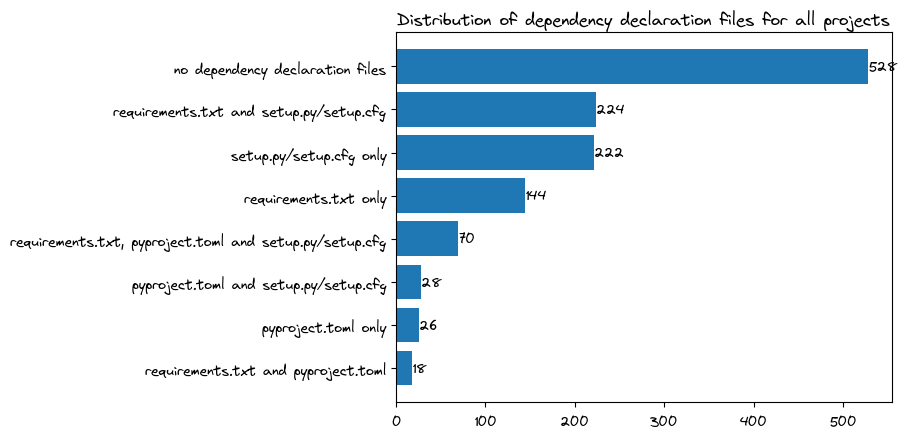

In [72]:
df_deps_count_sorted = df_deps_count.sort_values("count")
fig, ax = plt.subplots()
bars = plt.barh("type_", "count", data=df_deps_count_sorted)

ax.bar_label(bars)
plt.title("Distribution of dependency declaration files for all projects")
plt.savefig("distribution_deps_2.png",  dpi=600, bbox_inches="tight")
plt.show()


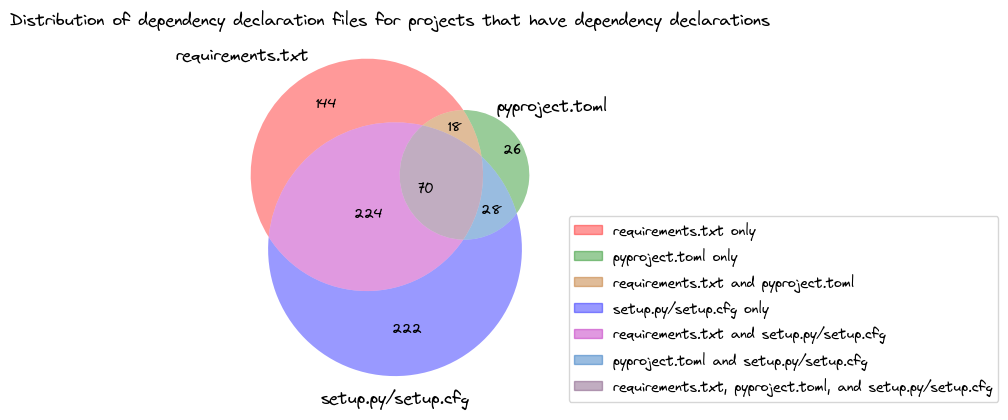

In [73]:

# Draw a venn diagram
plt.figure()
ax = plt.gca()

set_1_name = "requirements.txt"
set_2_name = "pyproject.toml"
set_3_name = "setup.py/setup.cfg"

venn_parsers = venn3(
    [project_req_txt, project_pyproject_toml, project_setup],
    set_labels=(set_1_name, set_2_name, set_3_name),
    ax=ax,
)

# Define labels for all sets and intersections
# for a 3-circle diagram, the sequence is 100, 010, 110, 001, 101, 011, 111
legend_labels = [
    f"{set_1_name} only",
    f"{set_2_name} only",
    f"{set_1_name} and {set_2_name}",
    f"{set_3_name} only",
    f"{set_1_name} and {set_3_name}",
    f"{set_2_name} and {set_3_name}",
    f"{set_1_name}, {set_2_name}, and {set_3_name}",
]

legend_handles = [
    Patch(
        color=patch.get_facecolor(),
        label=legend_labels[venn_parsers.patches.index(patch)],
    )
    for patch in venn_parsers.patches
    if patch
]

plt.legend(handles=legend_handles, loc=(1.04, 0))
plt.title(
    "Distribution of dependency declaration files for projects that have dependency declarations")
plt.savefig("distribution_deps_3.png", dpi=600, bbox_inches="tight")
plt.show()


In [146]:
# List of import patterns to store DataFrames for each project
project_dfs_metadata = []
project_dfs_codedirs = []
project_dfs_deps = []
project_dfs_imports = []

In [147]:
# Iterate through JSON files in the directory
for filename in os.listdir(data_path):

    file_path = os.path.join(data_path, filename)

    # Load JSON data from the file
    with open(file_path, "r") as file:
        project_data = json.load(file)

    # Extract data from the project_data
    metadata = project_data.get("metadata", {})
    codedirs = project_data.get("code_dirs", {})
    deps_list = project_data.get("deps_file", [])
    imports_list = project_data.get("imports", [])

    metadata_list = [metadata]
    metadata_data = pd.DataFrame(metadata_list)

    project_dfs_metadata.append(metadata_data)

    # Create a list of dictionaries of code directories
    if codedirs:
        codedirs_dicts = [
            {
                "code directory": key,
                ".py count": value["py"],
                ".ipynb count": value["ipynb"],
                "count": value["total"],
            }
            for key, value in codedirs.items()
        ]
    else:
        codedirs_dicts = [
            {
                "code directory": None,
                ".py count": 0,
                ".ipynb count": 0,
                "count": 0,
            }
        ]

    # Create a DataFrame from the list of dictionaries
    codedirs_data = pd.DataFrame(codedirs_dicts)
    codedirs_data["project_name"] = metadata.get("project_name")

    # Append the DataFrame to the list
    project_dfs_codedirs.append(codedirs_data)

    # Create a list of dictionaries of dependency declaration files
    deps_dicts = [
        {
            "parser_choice": dep_data["parser_choice"],
            "path": dep_data["path"],
            "deps_count": dep_data["deps_count"],
            "warnings": dep_data["warnings"],
        }
        for dep_data in deps_list
        if deps_list
    ]

    if not deps_list:
        deps_dicts = [
            {
                "parser_choice": None,
                "path": None,
                "deps_count": None,
                "warnings": None,
            }
        ]

    # Create a DataFrame from the list of dictionaries
    deps_data = pd.DataFrame(deps_dicts)
    deps_data["project_name"] = metadata.get("project_name")

    # Append the DataFrame to the list
    project_dfs_deps.append(deps_data)

    # Create a list of dictionaries of imports
    def _process_import_data(import_data):
        import_type = list(import_data.keys())[0]
        # Combine primary alternative and alternative imports into a single alternative import type
        display_import_type = import_type.removesuffix(" (primary)")
        import_dict = {
            "import_type": display_import_type,
            "name": import_data[import_type]["name"],
            "lineno": import_data[import_type]["source"]["lineno"],
        }
        return import_dict

    imports_dicts = [_process_import_data(import_data) for import_data in imports_list]

    # Create a DataFrame from the list of dictionaries
    imports_data = pd.DataFrame(imports_dicts)
    imports_data["project_name"] = metadata.get("project_name")

    # Append the DataFrame to the list
    project_dfs_imports.append(imports_data)

# Combine all project DataFrames into a single DataFrame
df_metadata = pd.concat(project_dfs_metadata, ignore_index=True)
df_codedirs = pd.concat(project_dfs_codedirs, ignore_index=True)
df_deps = pd.concat(project_dfs_deps, ignore_index=True)
df_imports = pd.concat(project_dfs_imports, ignore_index=True)

# Data cleaning
There are some projects that don't have any Python code (`.py` or `.ipynb` files) at all, and they are obviously not in our scope.

In [148]:
df_codedirs_no_code = df_codedirs[df_codedirs["code directory"].isna()]
df_codedirs_no_code

,code directory,.py count,.ipynb count,count,project_name
53,None,0,0,0,cell_controller
60,None,0,0,0,Ty1_octet_itc
68,None,0,0,0,EnvMutationalShiftsPaper
78,None,0,0,0,YeastTrackAnalysis
83,None,0,0,0,aligner
...,...,...,...,...,...
13056,None,0,0,0,myconnectome-vm
13057,None,0,0,0,flu_PB1flank-GFP_neut_assay
13075,None,0,0,0,shipyard
13076,None,0,0,0,jobmaker.scif


In [149]:
df_codedirs_clean = df_codedirs[~df_codedirs["code directory"].isna()]
df_deps_clean = df_deps[
    ~df_deps["project_name"].isin(df_codedirs_no_code["project_name"])
]
df_imports_clean = df_imports[
    ~df_imports["project_name"].isin(df_codedirs_no_code["project_name"])
]

In [150]:
len(df_codedirs_clean)

12708

In [151]:
# In fact, there's no need to do `df_imports_clean` because there are no imports detected if there are no Python code :)
df_imports[df_imports["project_name"].isin(df_codedirs_no_code["project_name"])]

,import_type,name,lineno,project_name


## Clean codedirs to remove rows of `setup.py`

In [152]:
df_deps_setup_py = df_deps_clean[df_deps_clean["parser_choice"] == "setup.py"]

In [153]:
for path_to_decrement in df_deps_setup_py["path"]:
    mask = df_codedirs_clean["code directory"] == path_to_decrement
    df_codedirs_clean.loc[mask, ".py count"] -= 1
    df_codedirs_clean.loc[mask, "count"] -= 1

df_codedirs_clean = df_codedirs_clean[
    (df_codedirs_clean[".py count"] != 0) | (df_codedirs_clean["count"] == 0)
]

In [154]:
len(df_codedirs_clean)

11372

# Analysis
## Code directories

In [155]:
# Number of projects
df_codedirs_clean["project_name"].nunique()

1142

### Count of code directories
The count of code directories stands for the complexity of the project.

In [156]:
# Count of directories containing Python code per project
count_df_codedirs = (
    df_codedirs_clean.groupby("project_name").size().reset_index(name="codedirs_count")
)

In [157]:
count_df_codedirs

,project_name,codedirs_count
0,2013-khmer-counting,1
1,2018_ecoli_pathogenicity,1
2,2018koyeast,1
3,2019-nCov,1
4,2019_caicedo_cytometryA,5
...,...,...
1137,xacc,26
1138,xacc-vqe,10
1139,xray-thc,1
1140,yapic,4


In [158]:
# There are some projects that have over 200 directories containing Python code
count_df_sorted = count_df_codedirs.sort_values(by="codedirs_count", ascending=False)
count_df_sorted.head()

,project_name,codedirs_count
758,models,421
843,osparc-simcore,395
588,galaxy,334
689,keras,184
848,pandas,165


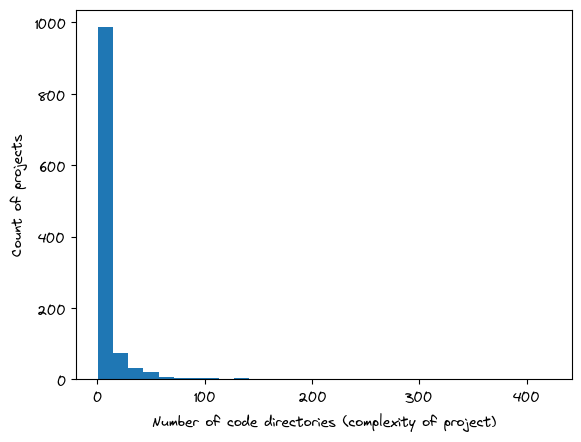

In [159]:
plt.hist(count_df_sorted["codedirs_count"], bins=30)
plt.xlabel("Number of code directories (complexity of project)")
plt.ylabel("Count of projects")
plt.show()

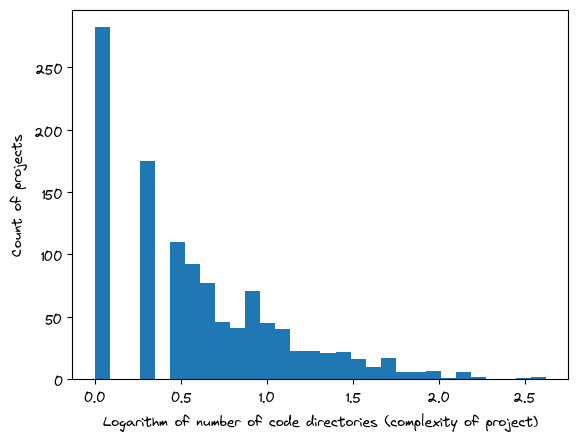

In [160]:
plt.hist(np.log10(count_df_sorted["codedirs_count"]), bins=30)
plt.xlabel("Logarithm of number of code directories (complexity of project)")
plt.ylabel("Count of projects")
plt.show()

In [161]:
count_df_sorted_truncated = count_df_sorted[count_df_sorted["codedirs_count"] < 200]

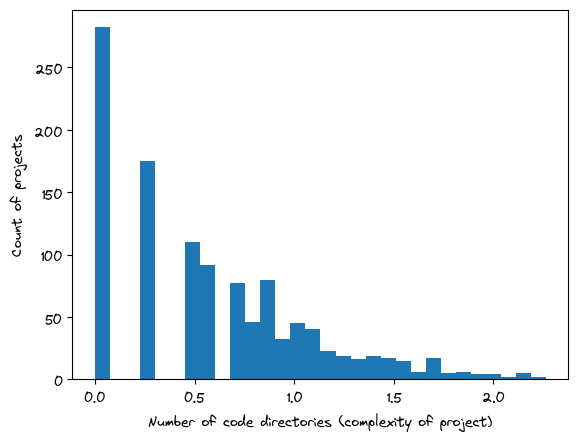

In [162]:
plt.hist(np.log10(count_df_sorted_truncated["codedirs_count"]), bins=30)
plt.xlabel("Number of code directories (complexity of project)")
plt.ylabel("Count of projects")
plt.show()

### Main code directory

In [163]:
df_codedirs_main_code = df_codedirs_clean[
    ~df_codedirs_clean["code directory"].str.contains("test", case=False)
    & ~df_codedirs_clean["code directory"].str.contains("example", case=False)
    & ~df_codedirs_clean["code directory"].str.contains("sample", case=False)
    & (
        ~df_codedirs_clean["code directory"].str.contains("doc", case=False)
        | df_codedirs_clean["code directory"].str.contains("docker", case=False)
        | df_codedirs_clean["code directory"].str.contains("docstring", case=False)
    )
]

In [164]:
df_codedirs_max = df_codedirs_main_code.loc[
    df_codedirs_main_code.groupby("project_name")["count"].idxmax()
]

#### Note: there are some projects where the Python code are only stored in `test`, `example`, `sample`, or `doc` files.

In [165]:
xxx = df_codedirs_clean[~df_codedirs_clean["project_name"].duplicated()]
xxx[~xxx["project_name"].isin(df_codedirs_max["project_name"])]

,code directory,.py count,.ipynb count,count,project_name
387,for-app-developers/cy-automation-cy-rest-best-...,1,0,1,cytoscape-automation
480,docs,1,0,1,cy-community-detection
527,examples/python/basic/cytoscape,2,0,2,cyREST
578,hierarchical-framework-intestinal-epithelium/code,2,8,10,open-manuscripts
1285,testing,2,0,2,rdkit-tutorials
4429,docs/code,11,0,11,nix
5183,latest_notebook,1,1,2,single-cell-tutorial
7629,examples/full-demo,1,0,1,ten-simple-rules-dockerfiles
8382,tests,1,0,1,mockrobiota
9495,docs,1,0,1,labstreaminglayer


In [166]:
# Divide projects into three groups by code directory patterns
same_name_projects = df_codedirs_max[
    df_codedirs_max["code directory"] == df_codedirs_max["project_name"]
]["project_name"].tolist()

src_projects = df_codedirs_max.dropna()[
    df_codedirs_max.dropna()["code directory"].str.startswith("src")
]["project_name"].tolist()

root_dir_projects = df_codedirs_max[df_codedirs_max["code directory"] == "."][
    "project_name"
].tolist()

rest_projects = df_codedirs_max[
    ~df_codedirs_max["project_name"].isin(
        same_name_projects + src_projects + root_dir_projects
    )
]["project_name"].tolist()

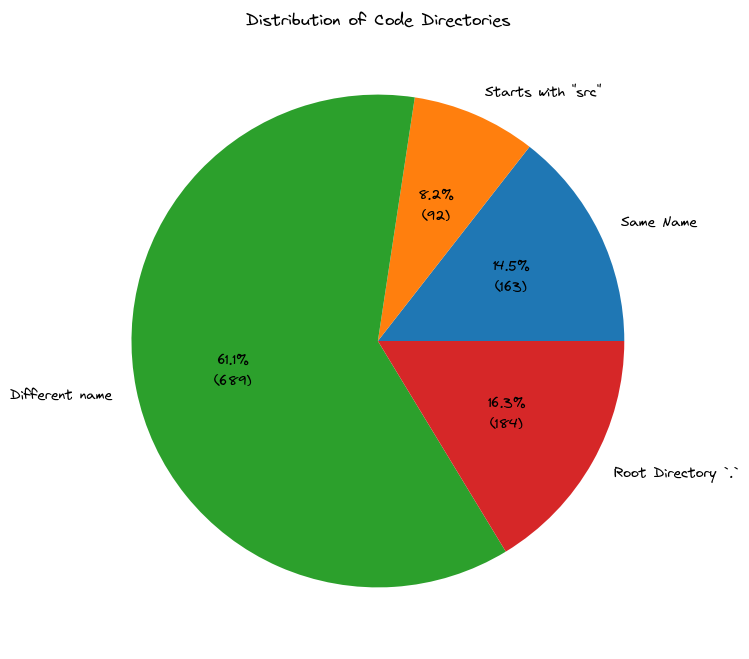

In [167]:
# Create a DataFrame for plotting
plot_data = pd.DataFrame(
    {
        "Category": [
            "Same Name",
            'Starts with "src"',
            "Different name",
            "Root Directory `.`",
        ],
        "Percentage": [
            len(same_name_projects),
            len(src_projects),
            len(rest_projects),
            len(root_dir_projects),
        ],
        "Projects": [
            same_name_projects,
            src_projects,
            rest_projects,
            root_dir_projects,
        ],
    }
)


def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return "{:.1f}%\n({v:d})".format(pct, v=val)

    return my_format


# Plotting as a pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    plot_data["Percentage"],
    labels=plot_data.apply(lambda x: f"{x['Category']}", axis=1),
    autopct=autopct_format(plot_data["Percentage"]),
)
plt.title("Distribution of Code Directories")
plt.show()

## Dependency declaration files

In [168]:
df_deps_clean

,parser_choice,path,deps_count,warnings,project_name
0,requirements.txt,test/requirements-testing.txt,8,False,darkflow
1,setup.py,setup.py,0,True,darkflow
2,setup.py,setup.py,3,False,encode2bag
3,None,None,None,None,Iterative-HMMER
4,None,None,None,None,corneal_endothelium_TVST
...,...,...,...,...,...
3129,pyproject.toml,pyproject.toml,0,False,gseapy
3130,requirements.txt,requirements.txt,14,False,medaka
3131,pyproject.toml,pyproject.toml,0,False,medaka
3132,setup.py,setup.py,0,True,medaka


In [169]:
# Divide projects into three groups by parser choice
project_req_txt = set(
    df_deps_clean[df_deps_clean["parser_choice"] == "requirements.txt"]["project_name"]
)
project_req_txt_no_deps = set(
    df_deps_clean[df_deps_clean["parser_choice"] == "requirements.txt"].loc[
        df_deps_clean["deps_count"] == 0
    ]["project_name"]
)
project_pyproject_toml = set(
    df_deps_clean[df_deps_clean["parser_choice"] == "pyproject.toml"]["project_name"]
)
project_pyproject_toml_no_deps = set(
    df_deps_clean[df_deps_clean["parser_choice"] == "pyproject.toml"].loc[
        df_deps_clean["deps_count"] == 0
    ]["project_name"]
)
project_setup = set(
    df_deps_clean.dropna()[
        df_deps_clean.dropna()["parser_choice"].str.startswith("setup")
    ]["project_name"]
)
project_no_deps = set(
    df_deps_clean[df_deps_clean["parser_choice"].isnull()]["project_name"]
)

In [170]:
project_req_only = project_req_txt - project_pyproject_toml - project_setup
project_toml_only = project_pyproject_toml - project_req_txt - project_setup
project_setup_only = project_setup - project_req_txt - project_pyproject_toml
project_req_toml = project_req_txt.intersection(
    project_pyproject_toml
) - project_req_txt.intersection(project_pyproject_toml).intersection(project_setup)
project_req_setup = project_req_txt.intersection(
    project_setup
) - project_req_txt.intersection(project_pyproject_toml).intersection(project_setup)
project_toml_setup = project_pyproject_toml.intersection(
    project_setup
) - project_req_txt.intersection(project_pyproject_toml).intersection(project_setup)
project_req_toml_setup = project_req_txt.intersection(
    project_pyproject_toml
).intersection(project_setup)

In [171]:
df_deps_count = pd.DataFrame(
    dict(
        type_=[
            "requirements.txt only",
            "pyproject.toml only",
            "setup.py/setup.cfg only",
            "requirements.txt and pyproject.toml",
            "requirements.txt and setup.py/setup.cfg",
            "pyproject.toml and setup.py/setup.cfg",
            "requirements.txt, pyproject.toml and setup.py/setup.cfg",
            "no dependency declaration files",
        ],
        count=[
            len(project_req_only),
            len(project_toml_only),
            len(project_setup_only),
            len(project_req_toml),
            len(project_req_setup),
            len(project_toml_setup),
            len(project_req_toml_setup),
            len(project_no_deps),
        ],
    )
)

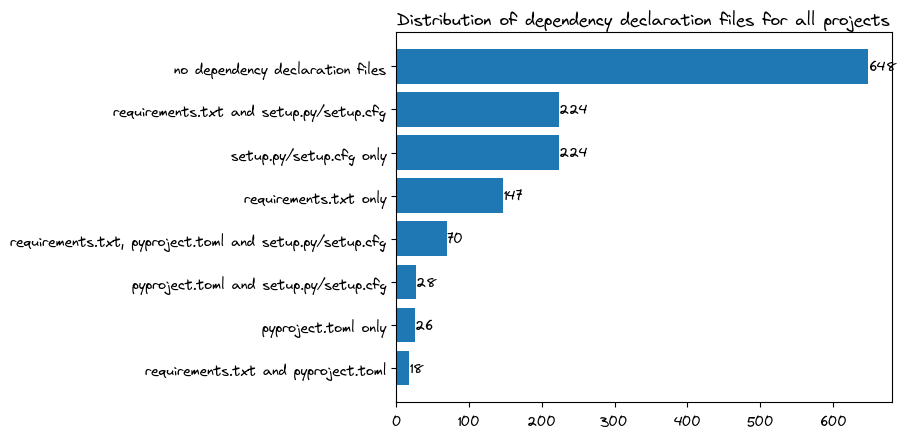

In [172]:
df_deps_count_sorted = df_deps_count.sort_values("count")
fig, ax = plt.subplots()
bars = plt.barh("type_", "count", data=df_deps_count_sorted)

ax.bar_label(bars)
plt.title("Distribution of dependency declaration files for all projects")
plt.show()

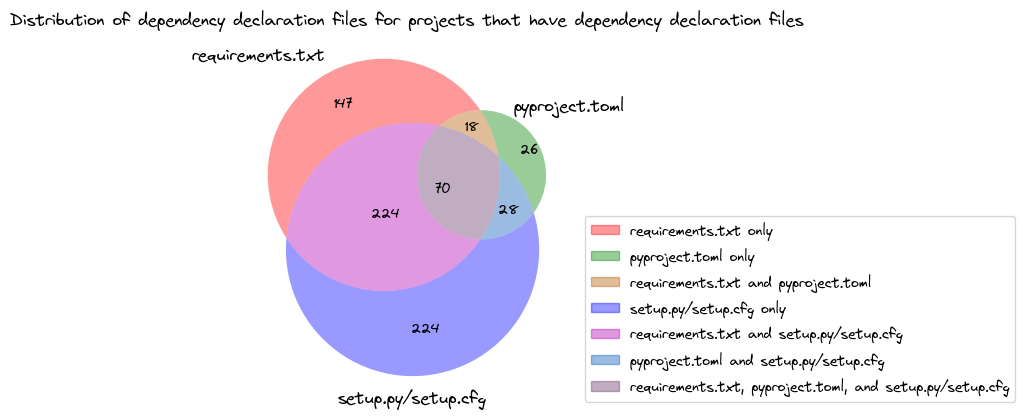

In [173]:

# Draw a venn diagram
plt.figure()
ax = plt.gca()

set_1_name = "requirements.txt"
set_2_name = "pyproject.toml"
set_3_name = "setup.py/setup.cfg"

venn_parsers = venn3(
    [project_req_txt, project_pyproject_toml, project_setup],
    set_labels=(set_1_name, set_2_name, set_3_name),
    ax=ax,
)

# Define labels for all sets and intersections
# for a 3-circle diagram, the sequence is 100, 010, 110, 001, 101, 011, 111
legend_labels = [
    f"{set_1_name} only",
    f"{set_2_name} only",
    f"{set_1_name} and {set_2_name}",
    f"{set_3_name} only",
    f"{set_1_name} and {set_3_name}",
    f"{set_2_name} and {set_3_name}",
    f"{set_1_name}, {set_2_name}, and {set_3_name}",
]

legend_handles = [
    Patch(
        color=patch.get_facecolor(),
        label=legend_labels[venn_parsers.patches.index(patch)],
    )
    for patch in venn_parsers.patches
    if patch
]

plt.legend(handles=legend_handles, loc=(1.04, 0))
plt.title(
    "Distribution of dependency declaration files for projects that have dependency declaration files")
plt.show()

## Import patterns

In [174]:
df_imports_clean.head()

,import_type,name,lineno,project_name
0,Regular,tensorflow,1.0,darkflow
1,Regular,tensorflow,3.0,darkflow
2,Regular,numpy,5.0,darkflow
3,Regular,numpy,3.0,darkflow
4,Regular,tensorflow,4.0,darkflow


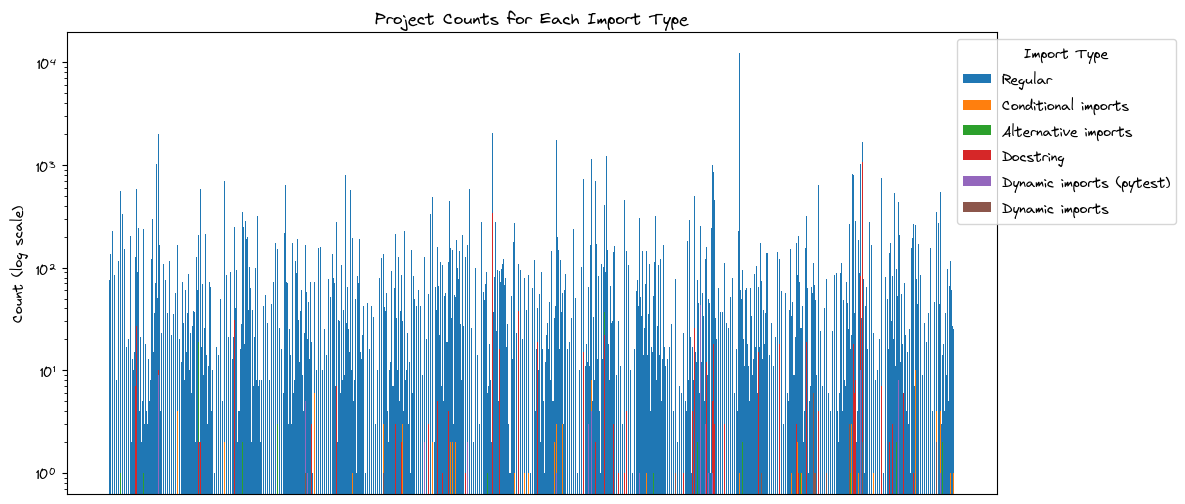

In [175]:
# Create a bar plot for the counts of each import type
frame = plt.figure(figsize=(12, 6))

# Iterate over unique import types and plot a bar for each
for import_type in df_imports_clean["import_type"].unique():
    import_type_data = df_imports_clean[df_imports_clean["import_type"] == import_type]
    project_counts = import_type_data.groupby("project_name").size()
    plt.bar(project_counts.index, project_counts, label=import_type)
    plt.yscale("log")  # Apply log scale to the y-axis for the plot
    plt.ylabel("Count (log scale)")
    plt.title("Project Counts for Each Import Type")
    plt.legend(title="Import Type", loc="upper right", bbox_to_anchor=(1.2, 1))
    # Hide x axis
    for axis in frame.axes:
        axis.get_xaxis().set_visible(False)

# Set the common x-axis label
plt.xlabel("Project Name")

plt.show()

In [176]:
# Divide projects into three groups by parser choice
project_conditional_imports = set(
    df_imports_clean[df_imports_clean["import_type"] == "Conditional imports"][
        "project_name"
    ]
)
project_alternative_imports = set(
    df_imports_clean[df_imports_clean["import_type"] == "Alternative imports"][
        "project_name"
    ]
)
project_dynamic_imports = set(
    df_imports_clean[df_imports_clean["import_type"] == "Dynamic imports"][
        "project_name"
    ]
)
project_docstring = set(
    df_imports_clean[df_imports_clean["import_type"] == "Docstring"]["project_name"]
)
project_all = set(df_codedirs_clean["project_name"])

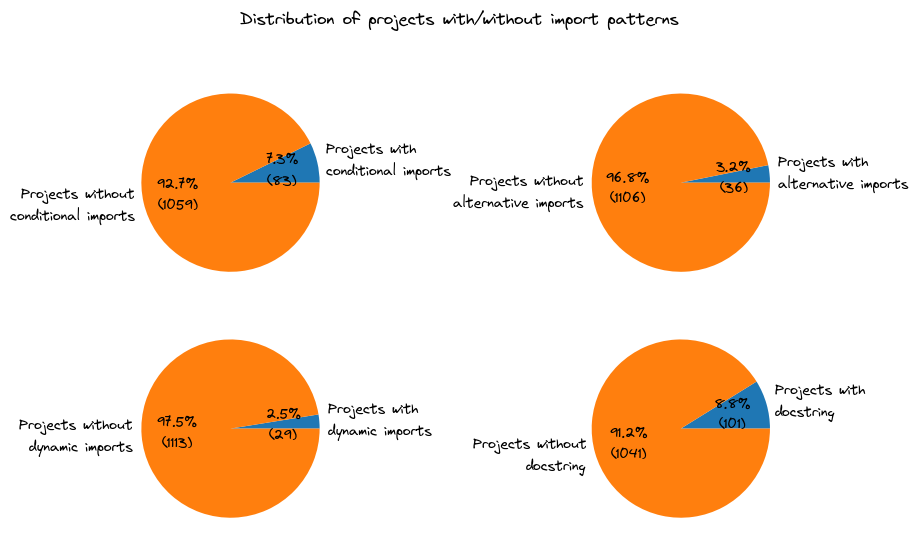

In [177]:
def create_plot_data(import_pattern, import_set):
    return pd.DataFrame(
        {
            "Category": [
                f"Projects with \n{import_pattern}",
                f"Projects without\n{import_pattern}",
            ],
            "Percentage": [
                len(import_set),
                len(project_all) - len(import_set),
            ],
        }
    )


def create_pie_chart(plot_data, axis):
    axis.pie(
        plot_data["Percentage"],
        labels=plot_data.apply(lambda x: f"{x['Category']}", axis=1),
        autopct=autopct_format(plot_data["Percentage"]),
    )


figure, axis = plt.subplots(2, 2, figsize=(9, 6), layout="compressed")

create_pie_chart(
    create_plot_data("conditional imports", project_conditional_imports), axis[0, 0]
)
create_pie_chart(
    create_plot_data("alternative imports", project_alternative_imports), axis[0, 1]
)
create_pie_chart(
    create_plot_data("dynamic imports", project_dynamic_imports), axis[1, 0]
)
create_pie_chart(create_plot_data("docstring", project_docstring), axis[1, 1])

plt.suptitle("Distribution of projects with/without import patterns")
plt.show()

## Correlations

### Code directories whose names are `notebooks`

In [178]:
df_codedirs_clean[df_codedirs_clean["code directory"] == "notebooks"]

,code directory,.py count,.ipynb count,count,project_name
505,notebooks,3,15,18,carboxecoli
1278,notebooks,1,5,6,inYourFace
1356,notebooks,6,5,11,dtrace
4370,notebooks,1,7,8,gwaskb
5297,notebooks,1,2,3,hlda
5338,notebooks,1,22,23,wiki-citation-usage
5697,notebooks,1,1,2,expipe-plugin-cinpla
7759,notebooks,1,5,6,lvv-ri
10707,notebooks,2,6,8,g2p-aggregator
10938,notebooks,1,11,12,multi-omics-state-of-the-field


### Count of Python files in the main code directory VS dependency declarations

In [179]:
conditions = [
    (df_codedirs_max["project_name"].isin(project_req_only)),
    (df_codedirs_max["project_name"].isin(project_toml_only)),
    (df_codedirs_max["project_name"].isin(project_setup_only)),
    (df_codedirs_max["project_name"].isin(project_req_toml)),
    (df_codedirs_max["project_name"].isin(project_req_setup)),
    (df_codedirs_max["project_name"].isin(project_toml_setup)),
    (df_codedirs_max["project_name"].isin(project_req_toml_setup)),
    (df_codedirs_max["project_name"].isin(project_no_deps)),
]

# create a list of the values we want to assign for each condition
values = [
    "requirements.txt only",
    "pyproject.toml only",
    "setup.py/setup.cfg only",
    "requirements.txt and pyproject.toml",
    "requirements.txt and setup.py/setup.cfg",
    "pyproject.toml and setup.py/setup.cfg",
    "requirements.txt, pyproject.toml and setup.py/setup.cfg",
    "no dependency declaration files",
]

desired_order = [
    "no dependency declaration files",
    "requirements.txt only",
    "pyproject.toml only",
    "setup.py/setup.cfg only",
    "requirements.txt and pyproject.toml",
    "requirements.txt and setup.py/setup.cfg",
    "pyproject.toml and setup.py/setup.cfg",
    "requirements.txt, pyproject.toml and setup.py/setup.cfg",
]

# create a new column and use np.select to assign values to it using our lists as arguments
df_codedirs_max["deps"] = np.select(conditions, values)

In [180]:
df_codedirs_max["deps"] = pd.Categorical(
    df_codedirs_max["deps"], categories=desired_order, ordered=True
)

In [181]:
df_codedirs_max

,code directory,.py count,.ipynb count,count,project_name,deps
5703,pipeline,8,0,8,2013-khmer-counting,no dependency declaration files
4336,src,12,0,12,2018_ecoli_pathogenicity,no dependency declaration files
3606,src,2,0,2,2018koyeast,no dependency declaration files
4335,.,1,0,1,2019-nCov,no dependency declaration files
5241,unet4nuclei/utils,11,1,12,2019_caicedo_cytometryA,no dependency declaration files
...,...,...,...,...,...,...
9434,python/plugins/dwave,3,0,3,xacc,requirements.txt only
5621,benchmark,6,0,6,xacc-vqe,requirements.txt and setup.py/setup.cfg
653,analysis_notebooks,1,1,2,xray-thc,requirements.txt only
366,yapic,7,0,7,yapic,setup.py/setup.cfg only


In [200]:
df_codedirs_max[".ipynb>=5"] = np.where(
    df_codedirs_max[".ipynb count"] >= 5, True, False
)

Text(0.5, 0, 'Python code files count in the main code directory')

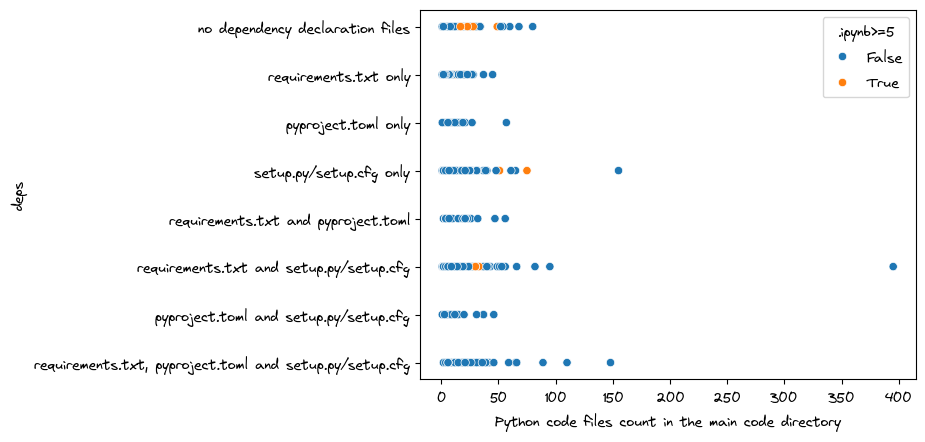

In [183]:
ax = sns.scatterplot(data=df_codedirs_max, x="count", y="deps", hue=".ipynb>=5")
ax.set_xlabel("Python code files count in the main code directory")

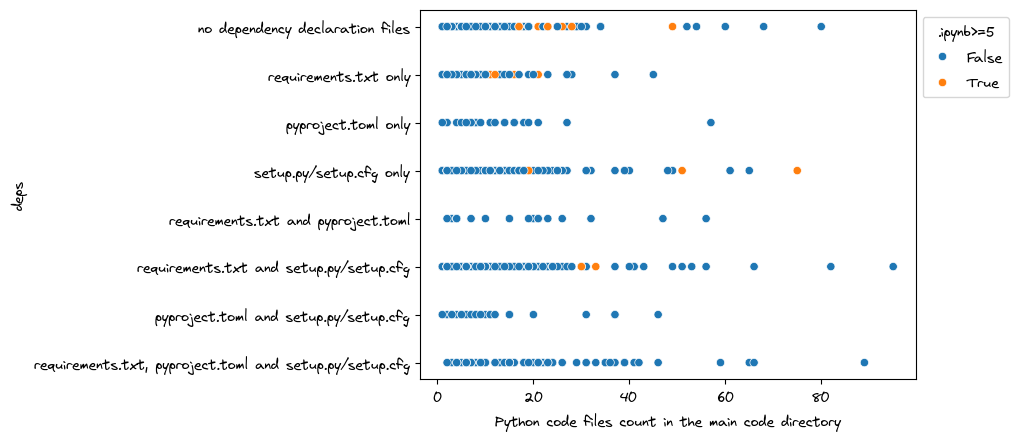

In [199]:
ax = sns.scatterplot(data=df_codedirs_max[df_codedirs_max["count"] < 100], x="count", y="deps", hue=".ipynb>=5")
ax.set_xlabel("Python code files count in the main code directory")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1,1))
plt.savefig("correlation_deps_count.png",  dpi=600, bbox_inches="tight")


In [184]:
df_codedirs_max[df_codedirs_max["count"] > 100]

,code directory,.py count,.ipynb count,count,project_name,deps,.ipynb>=5
954,cirq-core/cirq/ops,110,0,110,Cirq,"requirements.txt, pyproject.toml and setup.py/...",False
9498,sdks/python/client/argo_workflows/model,395,0,395,argo,requirements.txt and setup.py/setup.cfg,False
1500,packages/postgres-database/src/simcore_postgre...,148,0,148,osparc-simcore,"requirements.txt, pyproject.toml and setup.py/...",False
7763,scripts,155,0,155,qiime,setup.py/setup.cfg only,False


### Number of directories containing Python files VS dependency declarations

In [49]:
count_df_codedirs

,project_name,codedirs_count
0,1kp,3
1,2013-khmer-counting,1
2,2018_Bacterial_Pipeline_riboseq,1
3,2018_ecoli_pathogenicity,1
4,2018koyeast,1
...,...,...
1224,xacc,26
1225,xacc-vqe,10
1226,xray-thc,1
1227,yapic,4


In [50]:
conditions = [
    (count_df_codedirs["project_name"].isin(project_req_only)),
    (count_df_codedirs["project_name"].isin(project_toml_only)),
    (count_df_codedirs["project_name"].isin(project_setup_only)),
    (count_df_codedirs["project_name"].isin(project_req_toml)),
    (count_df_codedirs["project_name"].isin(project_req_setup)),
    (count_df_codedirs["project_name"].isin(project_toml_setup)),
    (count_df_codedirs["project_name"].isin(project_req_toml_setup)),
    (count_df_codedirs["project_name"].isin(project_no_deps)),
]

# create a list of the values we want to assign for each condition
values = [
    "requirements.txt only",
    "pyproject.toml only",
    "setup.py/setup.cfg only",
    "requirements.txt and pyproject.toml",
    "requirements.txt and setup.py/setup.cfg",
    "pyproject.toml and setup.py/setup.cfg",
    "requirements.txt, pyproject.toml and setup.py/setup.cfg",
    "no dependency declaration files",
]

desired_order = [
    "no dependency declaration files",
    "requirements.txt only",
    "pyproject.toml only",
    "setup.py/setup.cfg only",
    "requirements.txt and pyproject.toml",
    "requirements.txt and setup.py/setup.cfg",
    "pyproject.toml and setup.py/setup.cfg",
    "requirements.txt, pyproject.toml and setup.py/setup.cfg",
]


# create a new column and use np.select to assign values to it using our lists as arguments
count_df_codedirs["deps"] = np.select(conditions, values)

In [51]:
count_df_codedirs["deps"] = pd.Categorical(
    count_df_codedirs["deps"], categories=desired_order, ordered=True
)

In [52]:
count_df_codedirs

,project_name,codedirs_count,deps
0,1kp,3,no dependency declaration files
1,2013-khmer-counting,1,no dependency declaration files
2,2018_Bacterial_Pipeline_riboseq,1,no dependency declaration files
3,2018_ecoli_pathogenicity,1,no dependency declaration files
4,2018koyeast,1,no dependency declaration files
...,...,...,...
1224,xacc,26,requirements.txt only
1225,xacc-vqe,10,requirements.txt and setup.py/setup.cfg
1226,xray-thc,1,requirements.txt only
1227,yapic,4,setup.py/setup.cfg only


Text(0.5, 0, 'Count of directories containing Python files')

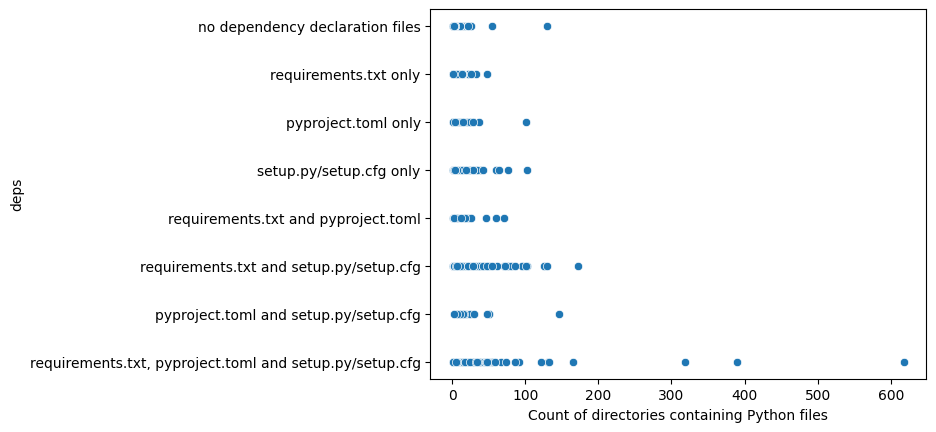

In [53]:
ax = sns.scatterplot(data=count_df_codedirs, x="codedirs_count", y="deps")
ax.set_xlabel("Count of directories containing Python files")

In [54]:
count_df_codedirs[count_df_codedirs["deps"] == "no dependency declaration files"][
    "codedirs_count"
].max()

130

In [55]:
count_df_codedirs[count_df_codedirs["codedirs_count"] == 130]

,project_name,codedirs_count,deps
773,longranger,130,no dependency declaration files
893,opencv,130,requirements.txt and setup.py/setup.cfg


In [56]:
df_metadata[df_metadata["project_name"] == "longranger"]

,project_name,fawltydeps_version,repo_url,creation_timestamp
1602,longranger,0.13.1.1,https://:@github.com/10XGenomics/longranger.git,2024-01-26T08:32:53.615111


In [57]:
df_codedirs_clean[df_codedirs_clean["project_name"] == "longranger"]

,code directory,.py count,.ipynb count,count,project_name
12235,tenkit/lib/python/tenkit,30,0,30,longranger
12236,lib/python/longranger/sv,10,0,10,longranger
12237,lib/python/longranger/test,7,0,7,longranger
12238,lib/python/longranger/cnv,6,0,6,longranger
12239,lib/python/longranger,4,0,4,longranger
...,...,...,...,...,...
12360,mro/stages/structvars/prepare_svcalling_ranges,1,0,1,longranger
12361,mro/stages/preflight/phaser_svcaller,1,0,1,longranger
12362,tenkit/mro/stages/make_fastqs/make_qc_summary,1,0,1,longranger
12363,tenkit/mro/stages/make_fastqs/merge_fastqs_by_...,1,0,1,longranger


### Correlation analysis based on Maria's FD analysis

In [58]:
# Code borrowed from Maria: https://github.com/mknorps/fd-analysis/blob/main/notebooks/analysis.ipynb

import json
import pandas as pd
import numpy as np
import seaborn as sns
import os
from collections import defaultdict
from pathlib import Path
from typing import List, Dict, Any


def filter_corrupt_files(paths: List[Path]) -> (List[Dict[str, Any]], List[str]):
    """
    Filter out files that are not valid json files
    """
    data = {}
    corrupt_files = []
    for path in paths:
        try:
            with open(path, "r") as f:
                single_result = json.load(f)
            data[path.name] = single_result
        except json.decoder.JSONDecodeError:
            corrupt_files.append(path.name)
    return data, corrupt_files


# import Zhinan's data

paths = "../experiments/biomedical_projects_experiment/results_20240126/"

data_z, corrupt_z = filter_corrupt_files(
    [Path(paths) / file for file in os.listdir(paths)]
)

codedirs = defaultdict(dict)
for d in data_z.values():
    if d["code_dirs"]:
        for folder, source_type_dict in d["code_dirs"].items():
            if folder.lower() == d["metadata"]["project_name"].lower():
                codedirs[d["metadata"]["project_name"]] |= {
                    ("PROJECT_NAME", "py"): source_type_dict["py"],
                    ("PROJECT_NAME", "ipynb"): source_type_dict["ipynb"],
                }
            else:
                codedirs[d["metadata"]["project_name"]] |= {
                    (folder, "py"): source_type_dict["py"],
                    (folder, "ipynb"): source_type_dict["ipynb"],
                }
    else:
        codedirs[d["metadata"]["project_name"]] = {}

df_codedirs = pd.DataFrame.from_dict(codedirs, orient="index")

python_projects = set(df_codedirs.index)

# Are folders specialized - either for Python files or for notebooks?

# How many subcolumns nave both nonzero values, compared to one column having zero value?

codedirs_py = df_codedirs.xs("py", level=1, axis=1)
codedirs_ipynb = df_codedirs.xs("ipynb", level=1, axis=1)

# print("Python files only")
# display(codedirs_py.head())
# print("Notebooks only")
# display(codedirs_ipynb.head())

codedirs_sum = codedirs_py + codedirs_ipynb

# print("Sum of Python files and notebooks")
# display(codedirs_sum.head())

only_py_df = (codedirs_ipynb == 0) & (codedirs_py > 0)
only_ipynb_df = (codedirs_ipynb > 0) & (codedirs_py == 0)
both_df = (codedirs_ipynb > 0) & (codedirs_py > 0)

In [58]:
conditions = [
    (codedirs_sum.index.isin(project_req_only)),
    (codedirs_sum.index.isin(project_toml_only)),
    (codedirs_sum.index.isin(project_setup_only)),
    (codedirs_sum.index.isin(project_req_toml)),
    (codedirs_sum.index.isin(project_req_setup)),
    (codedirs_sum.index.isin(project_toml_setup)),
    (codedirs_sum.index.isin(project_req_toml_setup)),
    (codedirs_sum.index.isin(project_no_deps)),
]

# create a list of the values we want to assign for each condition
values = [
    "requirements.txt only",
    "pyproject.toml only",
    "setup.py/setup.cfg only",
    "requirements.txt and pyproject.toml",
    "requirements.txt and setup.py/setup.cfg",
    "pyproject.toml and setup.py/setup.cfg",
    "requirements.txt, pyproject.toml and setup.py/setup.cfg",
    "no dependency declaration files",
]

desired_order = [
    "no dependency declaration files",
    "requirements.txt only",
    "pyproject.toml only",
    "setup.py/setup.cfg only",
    "requirements.txt and pyproject.toml",
    "requirements.txt and setup.py/setup.cfg",
    "pyproject.toml and setup.py/setup.cfg",
    "requirements.txt, pyproject.toml and setup.py/setup.cfg",
]


# create a new column and use np.select to assign values to it using our lists as arguments
codedirs_sum["deps"] = np.select(conditions, values)

codedirs_sum["deps"] = pd.Categorical(
    codedirs_sum["deps"], categories=desired_order, ordered=True
)

In [59]:
len(codedirs_sum)

1473

In [60]:
count_df_deps = (
    df_deps_clean.groupby("project_name").size().reset_index(name="deps_files_count")
)
display(count_df_deps)

,project_name,deps_files_count
0,1kp,1
1,2013-khmer-counting,1
2,2018_Bacterial_Pipeline_riboseq,1
3,2018_ecoli_pathogenicity,1
4,2018koyeast,1
...,...,...
1468,xacc,1
1469,xacc-vqe,2
1470,xray-thc,1
1471,yapic,1


In [61]:
codedirs_sum_deps_count = codedirs_sum.join(
    count_df_deps.set_index("project_name"), how="left"
)

<Axes: xlabel='PROJECT_NAME', ylabel='deps'>

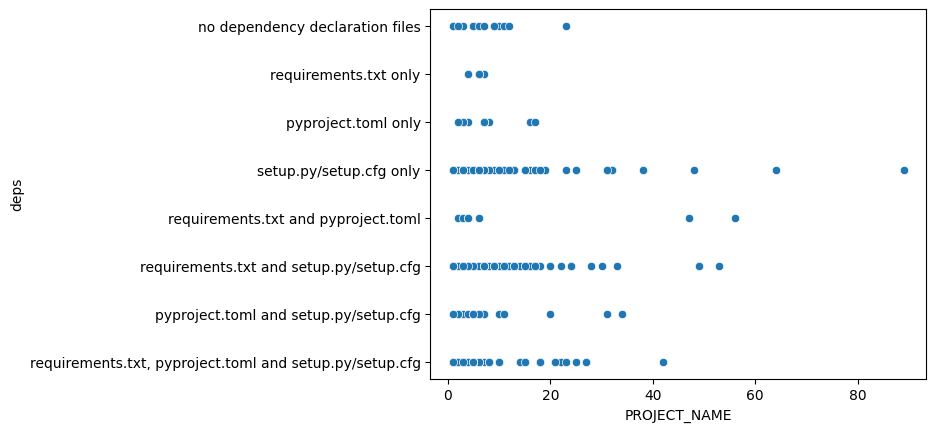

In [62]:
sns.scatterplot(x="PROJECT_NAME", y="deps", data=codedirs_sum)

<Axes: xlabel='PROJECT_NAME', ylabel='deps_files_count'>

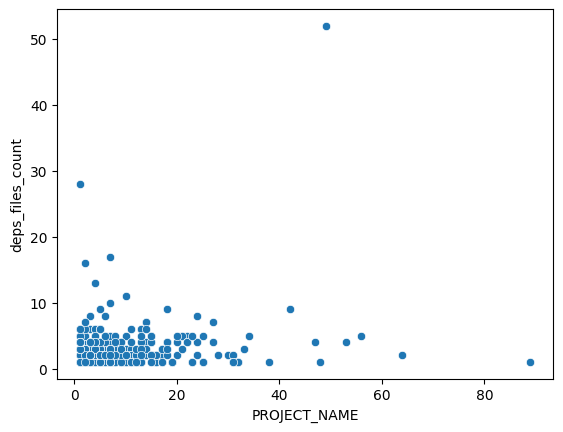

In [63]:
sns.scatterplot(x="PROJECT_NAME", y="deps_files_count", data=codedirs_sum_deps_count)

In [67]:
# Take a look at the strange point:
codedirs_sum_deps_count[codedirs_sum_deps_count["deps_files_count"] > 50][
    "PROJECT_NAME"
] > 40

gemini             True
ray               False
galaxy            False
osparc-simcore    False
Name: PROJECT_NAME, dtype: bool

In [68]:
# It has `requirements.txt` for different versions.
df_deps_clean[df_deps_clean["project_name"] == "gemini"]

,parser_choice,path,deps_count,warnings,project_name
795,requirements.txt,versioning/0.16.0/requirements_pip.txt,20,False,gemini
796,requirements.txt,versioning/0.15.0/requirements_conda.txt,0,False,gemini
797,requirements.txt,versioning/0.16.0/requirements_conda.txt,0,False,gemini
798,requirements.txt,versioning/0.9.1/requirements_conda.txt,0,False,gemini
799,requirements.txt,versioning/0.17.2/requirements_pip.txt,21,False,gemini
800,requirements.txt,versioning/0.18.2/requirements_conda.txt,8,False,gemini
801,requirements.txt,versioning/0.12.1/requirements_conda.txt,0,False,gemini
802,requirements.txt,versioning/0.16.1/requirements_conda.txt,0,False,gemini
803,requirements.txt,versioning/0.10.1/requirements_pip.txt,17,False,gemini
804,requirements.txt,versioning/0.13.0/requirements_pip.txt,17,False,gemini


In [69]:
codedirs_sum_deps_count[codedirs_sum_deps_count["PROJECT_NAME"] > 80].index

Index(['qiime'], dtype='object')

In [70]:
df_deps_clean[df_deps_clean["project_name"] == "qiime"]

,parser_choice,path,deps_count,warnings,project_name
2034,setup.py,setup.py,17,True,qiime


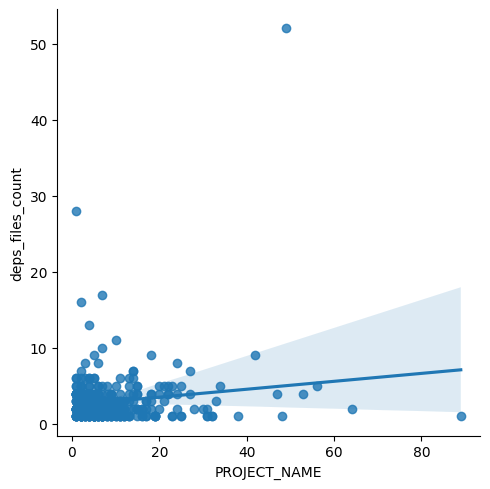

In [71]:
sns.lmplot(x="PROJECT_NAME", y="deps_files_count", data=codedirs_sum_deps_count)

In [72]:
codedirs_sum_deps_count["test-like dirs"] = codedirs_sum_deps_count.filter(
    like="test"
).sum(axis=1)

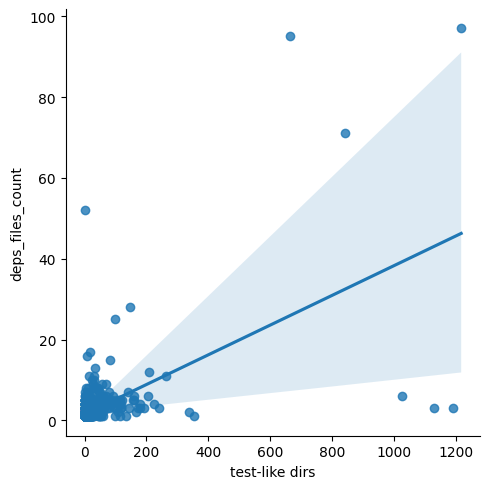

In [73]:
sns.lmplot(x="test-like dirs", y="deps_files_count", data=codedirs_sum_deps_count)

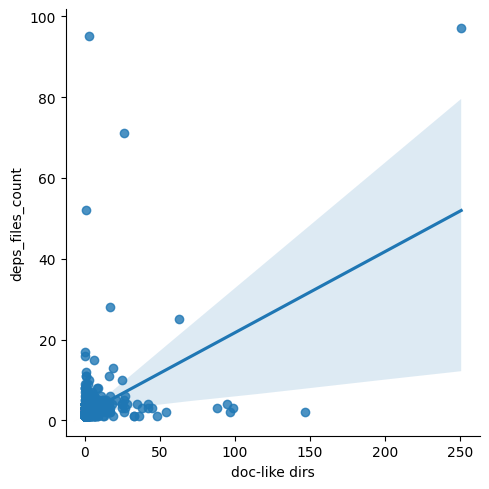

In [74]:
codedirs_sum_deps_count["doc-like dirs"] = codedirs_sum_deps_count.filter(
    like="doc"
).sum(axis=1)
sns.lmplot(x="doc-like dirs", y="deps_files_count", data=codedirs_sum_deps_count)

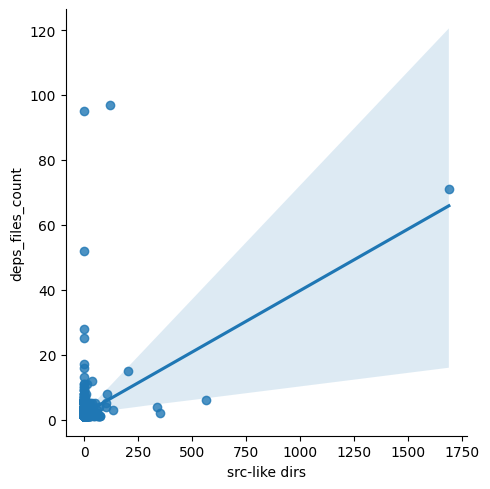

In [75]:
codedirs_sum_deps_count["src-like dirs"] = codedirs_sum_deps_count.filter(
    like="src"
).sum(axis=1)
sns.lmplot(x="src-like dirs", y="deps_files_count", data=codedirs_sum_deps_count)

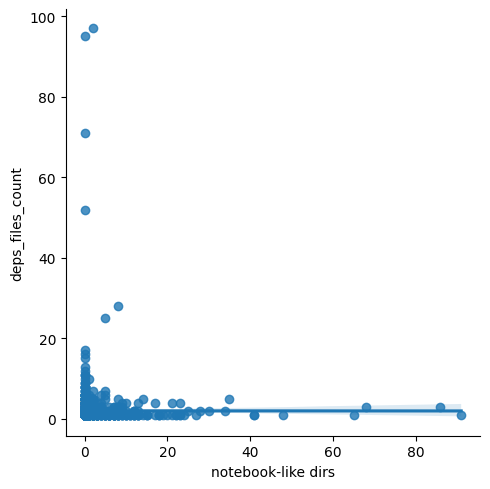

In [76]:
codedirs_sum_deps_count["notebook-like dirs"] = codedirs_sum_deps_count.filter(
    like="notebook"
).sum(axis=1)
sns.lmplot(x="notebook-like dirs", y="deps_files_count", data=codedirs_sum_deps_count)

<Axes: xlabel='notebook-like dirs', ylabel='deps'>

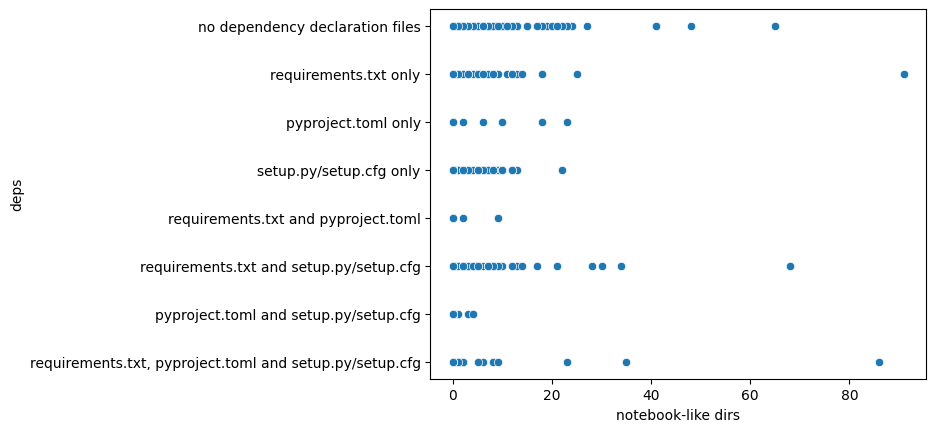

In [77]:
sns.scatterplot(x="notebook-like dirs", y="deps", data=codedirs_sum_deps_count)

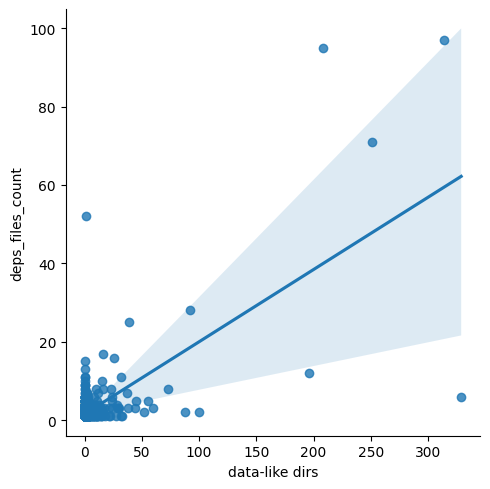

In [78]:
codedirs_sum_deps_count["data-like dirs"] = codedirs_sum_deps_count.filter(
    like="data"
).sum(axis=1)
sns.lmplot(x="data-like dirs", y="deps_files_count", data=codedirs_sum_deps_count)